<a href="https://colab.research.google.com/github/leiladanesh/data-mining/blob/main/Decision%20tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle

In [2]:
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c classifying-customers-into-segments

100% 104k/104k [00:00<00:00, 381kB/s]
100% 104k/104k [00:00<00:00, 381kB/s]


In [4]:
!unzip -qq classifying-customers-into-segments.zip

In [5]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np

In [6]:
data=pd.read_csv('Train.csv')
data=data.replace(["Male","Female"],[1,2])
data=data.replace(["No","Yes"],[1,2])
#data['Profession'].unique()
data=data.replace(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist','Executive', 'Doctor', 'Homemaker', 'Marketing'],[1,2,3,4,5,6,7,8,9])
data=data.fillna(0)
# data['Spending_Score'].unique()
data=data.replace(['Low', 'Average', 'High'],[1,2,3])
# data['Var_1'].unique()
data=data.replace(['Cat_1', 'Cat_2', 'Cat_3', 'Cat_4', 'Cat_5', 'Cat_6','Cat_7'],[1,2,3,4,5,6,7])
# data['Segmentation'].unique()
data=data.replace(['A', 'B', 'C','D'],[1,2,3,4])
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,1.0,22,1.0,1.0,1.0,1,4.0,4,4
1,462643,2,2.0,38,2.0,2.0,0.0,2,3.0,4,1
2,466315,2,2.0,67,2.0,2.0,1.0,1,1.0,6,2
3,461735,1,2.0,67,2.0,3.0,0.0,3,2.0,6,2
4,462669,2,2.0,40,2.0,4.0,0.0,3,6.0,6,1


In [37]:
# x=data[['Age','Gender','Ever_Married','Graduated','Profession','Work_Experience','Spending_Score','Family_Size','Var_1']]
fich=['Graduated','Ever_Married']
x=data[fich]
y=data[['Segmentation']]

In [38]:
X_train, X_test, y_train, y_test =train_test_split(x, y, test_size=0.30,random_state=10,shuffle=True)

In [39]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
print(clf)

DecisionTreeClassifier()


[Text(0.640625, 0.9, 'Ever_Married <= 1.5\ngini = 0.749\nsamples = 5647\nvalue = [1363, 1305, 1399, 1580]'),
 Text(0.40625, 0.7, 'Graduated <= 1.5\ngini = 0.668\nsamples = 2403\nvalue = [583, 350, 301, 1169]'),
 Text(0.25, 0.5, 'Graduated <= 0.5\ngini = 0.517\nsamples = 1192\nvalue = [182, 97, 120, 793]'),
 Text(0.125, 0.3, 'Ever_Married <= 0.5\ngini = 0.649\nsamples = 21\nvalue = [8, 3, 1, 9]'),
 Text(0.0625, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0]'),
 Text(0.1875, 0.1, 'gini = 0.648\nsamples = 19\nvalue = [6, 3, 1, 9]'),
 Text(0.375, 0.3, 'Ever_Married <= 0.5\ngini = 0.513\nsamples = 1171\nvalue = [174, 94, 119, 784]'),
 Text(0.3125, 0.1, 'gini = 0.612\nsamples = 43\nvalue = [10, 4, 5, 24]'),
 Text(0.4375, 0.1, 'gini = 0.508\nsamples = 1128\nvalue = [164, 90, 114, 760]'),
 Text(0.5625, 0.5, 'Ever_Married <= 0.5\ngini = 0.728\nsamples = 1211\nvalue = [401, 253, 181, 376]'),
 Text(0.5, 0.3, 'gini = 0.694\nsamples = 40\nvalue = [7, 18, 6, 9]'),
 Text(0.625, 0.3, 'gini = 0.72

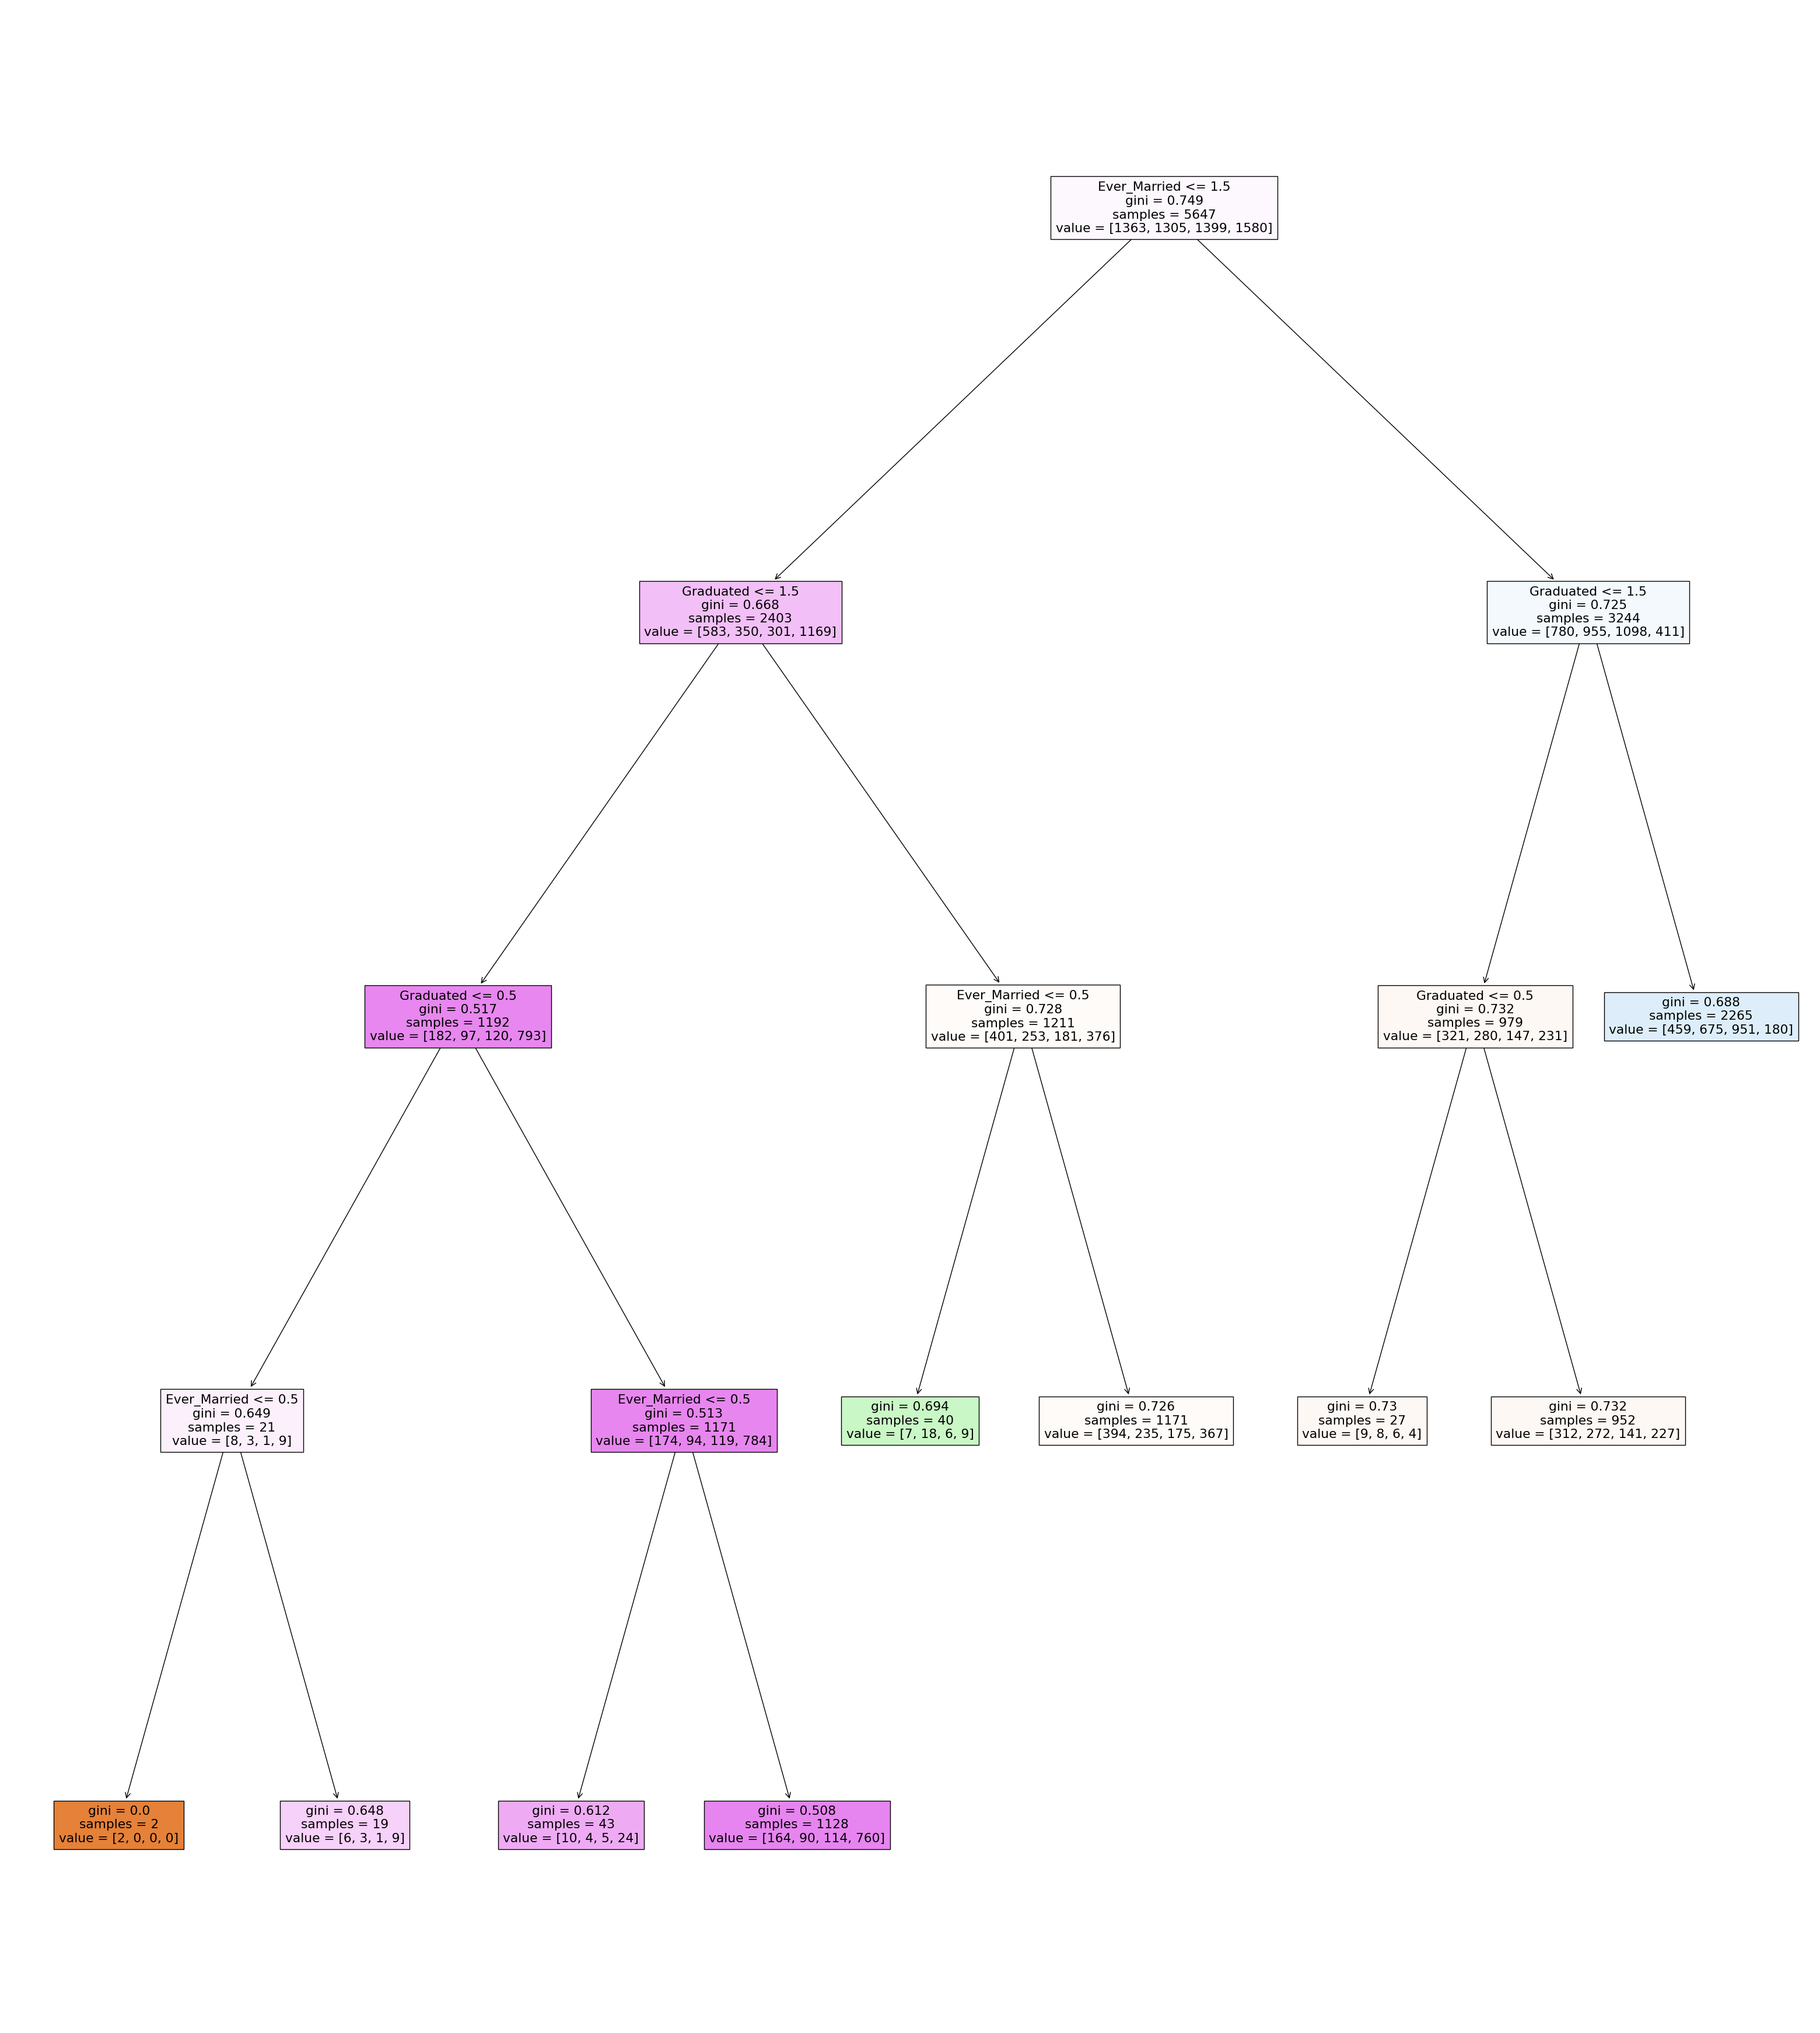

In [40]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(40,45))
tree.plot_tree(clf,filled=True,feature_names=fich)

In [42]:
actual=y_test
predict=clf.predict(X_test)

In [43]:
print(actual.shape)
print(predict.shape)
actual=np.squeeze(actual)
print(actual.shape)

(2421, 1)
(2421,)
(2421,)


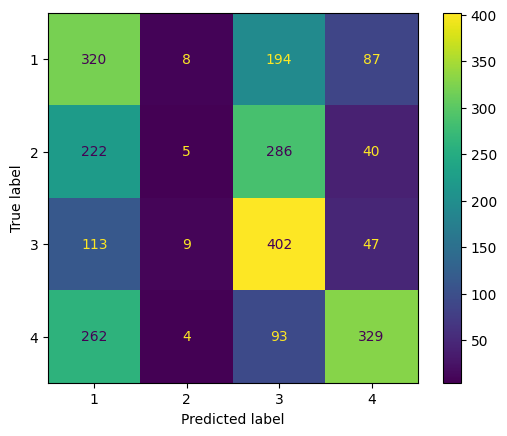

[[320   8 194  87]
 [222   5 286  40]
 [113   9 402  47]
 [262   4  93 329]]


In [45]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(actual, predict,labels=clf.classes_)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=clf.classes_)
cm_display.plot()
plt.show()
print(confusion_matrix)

In [46]:
from sklearn import metrics
Accuracy = metrics.accuracy_score(actual, predict)
Accuracy

0.436183395291202

In [47]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, predict,average='micro'))

Precision Score :  0.436183395291202


In [48]:
from sklearn.metrics import recall_score

print("Recall Score : ",recall_score(y_test, predict,average='micro'))

Recall Score :  0.436183395291202
